<a href="https://colab.research.google.com/github/georgsmeinung/simulacion-en-ciencia-datos/blob/main/Simulacion_Eventos_Discretos_Tarea_IA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Parámetros de la simulación ---
lambda_param = 5  # Tasa de llegada (eventos por unidad de tiempo)
T_max = 10         # Intervalo de tiempo total [0, T_max]

print(f"Iniciando simulación del Proceso de Poisson Homogéneo...")
print(f"Parámetros: lambda = {lambda_param}, Intervalo T = [0, {T_max}]")

Iniciando simulación del Proceso de Poisson Homogéneo...
Parámetros: lambda = 5, Intervalo T = [0, 10]


In [2]:
# --- 2. Simulación del Proceso ---
# En un proceso de Poisson homogéneo, los tiempos *entre* llegadas
# (inter-arrival times) siguen una distribución Exponencial con tasa lambda.
# El parámetro 'scale' de la función de numpy es 1/lambda.

arrival_times = []  # Lista para guardar los tiempos de llegada
current_time = 0    # Inicializamos el tiempo en 0

while True:
    # Generamos el tiempo hasta la próxima llegada
    # scale = 1 / lambda
    inter_arrival_time = np.random.exponential(scale=1/lambda_param)

    # Actualizamos el tiempo actual sumando el tiempo entre llegadas
    current_time += inter_arrival_time

    # Solo añadimos el evento si ocurre dentro del intervalo [0, T_max]
    if current_time <= T_max:
        arrival_times.append(current_time)
    else:
        # Si el evento ocurre fuera del intervalo, paramos el bucle
        break

# Número total de eventos generados
N_events = len(arrival_times)

In [3]:
# --- 3. Verificación de los datos generados ---
# La tarea pide verificar los tiempos de llegada y el número de eventos.
print(f"\n--- Verificación de la Simulación ---")
print(f"Número total de eventos simulados en [0, {T_max}]: {N_events}")
print("\nTiempos de llegada (primeros 20 eventos, si existen):")
# Usamos round() para facilitar la lectura
print([round(t, 2) for t in arrival_times[:20]])

# Verificación teórica:
# El número de eventos N(T) en [0, T] sigue una distribución de Poisson
# con parámetro (lambda * T).
teorico_mean_N = lambda_param * T_max
print(f"\nValor esperado teórico de eventos E[N(T)]: {teorico_mean_N}")
print(f"El valor simulado ({N_events}) debe ser cercano al valor esperado ({teorico_mean_N}).")


--- Verificación de la Simulación ---
Número total de eventos simulados en [0, 10]: 51

Tiempos de llegada (primeros 20 eventos, si existen):
[0.37, 0.57, 1.11, 1.46, 1.49, 1.51, 1.53, 1.87, 2.09, 2.11, 2.27, 2.52, 2.54, 2.72, 2.93, 3.03, 3.19, 3.25, 3.45, 3.55]

Valor esperado teórico de eventos E[N(T)]: 50
El valor simulado (51) debe ser cercano al valor esperado (50).


In [4]:
# --- 4. Preparación de datos para el gráfico ---

# A. Para el conteo acumulado simulado N(t) (gráfico escalonado)
if N_events > 0:
    # Empezamos en (0, 0)
    x_sim = [0] + arrival_times
    # El conteo (eje Y) empieza en 0 y sube en 1 por cada evento
    y_sim = list(range(0, N_events + 1))

    # Añadimos puntos finales para que el gráfico llegue hasta T_max
    x_sim.append(T_max)
    y_sim.append(N_events)
else:
    # Caso borde: no ocurrieron eventos
    x_sim = [0, T_max]
    y_sim = [0, 0]


# B. Para la media teórica E[N(t)] = lambda * t (línea recta)
# Creamos 100 puntos entre 0 y T_max para una línea suave
x_teorico = np.linspace(0, T_max, 100)
# Calculamos el valor esperado en cada punto t
y_teorico = lambda_param * x_teorico

<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:15: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:15: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-2045150753.py:11: SyntaxWarning: invalid escape sequence '\l'
  label=f'Media Teórica $E[N(t)] = \lambda \cdot t = {lambda_param}t$',
/tmp/ipython-input-2045150753.py:15: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f'Simulación de un Proceso de Poisson Homogéneo ($\lambda={lambda_param}$ en $T={T_max}$)', fontsize=16)



Generando gráfico...


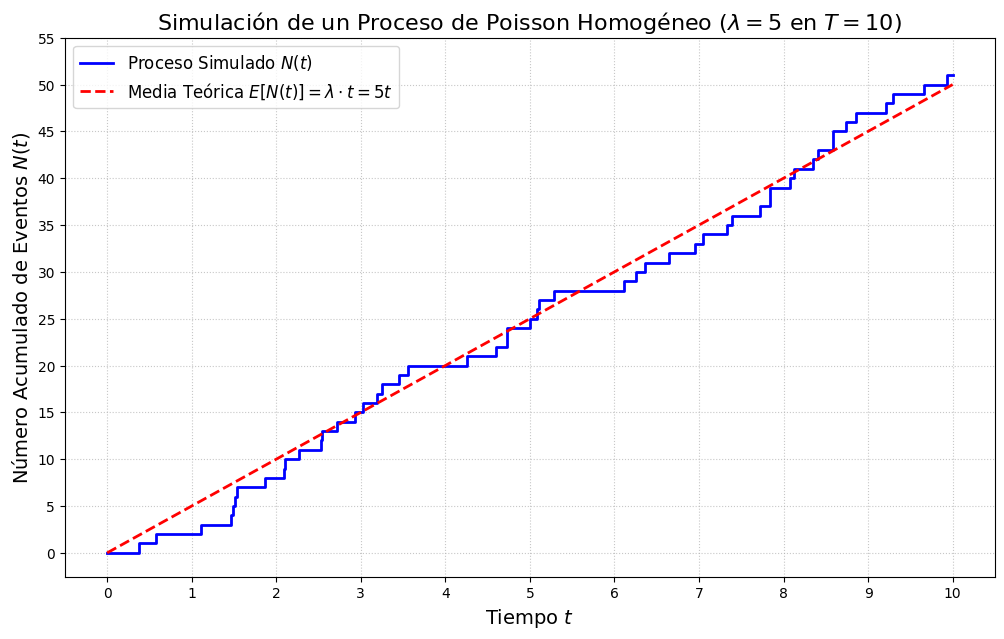

In [5]:
# --- 5. Representación Gráfica ---
print("\nGenerando gráfico...")
plt.figure(figsize=(12, 7))

# Dibujar la simulación (proceso de conteo acumulado)
# Usamos 'where='post'' para que el "salto" ocurra en el tiempo del evento
plt.step(x_sim, y_sim, where='post', label=f'Proceso Simulado $N(t)$', color='blue', linewidth=2)

# Dibujar la media teórica
plt.plot(x_teorico, y_teorico,
         label=f'Media Teórica $E[N(t)] = \lambda \cdot t = {lambda_param}t$',
         color='red', linestyle='--', linewidth=2)

# --- Configuración del gráfico ---
plt.title(f'Simulación de un Proceso de Poisson Homogéneo ($\lambda={lambda_param}$ en $T={T_max}$)', fontsize=16)
plt.xlabel('Tiempo $t$', fontsize=14)
plt.ylabel('Número Acumulado de Eventos $N(t)$', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.xticks(np.arange(0, T_max + 1, 1)) # Marcas en el eje X cada 1 unidad
plt.yticks(np.arange(0, max(y_sim) + 5, 5)) # Marcas en el eje Y
plt.show()